In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
insurance_csv = 'insurance.csv'
ins = pd.read_csv(insurance_csv)

In [3]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Check for any duplicated row
ins.loc[ins.duplicated(), :]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
# Remove duplicate and keep original
ins.drop_duplicates(inplace=True)

In [7]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
ins.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [10]:
((ins['bmi'] < 0) & (ins['charges'] < 0)).values.any() 
#check if there is any negative values

False

In [11]:
ins = ins.rename(columns={"charges": "premium_charges"})

In [12]:
ins['bmi'] = ins['bmi'].map(lambda x: round(x, 2))
ins['premium_charges'] = ins['premium_charges'].map(lambda x: round(x, 2))
ins.head()

,age,sex,bmi,children,smoker,region,premium_charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [13]:
def bmi_group(x):
    
    if x < 18.5:
        return 'Underweight'
    
    elif x > 18.5 and x <=24.9:
        return "Healthy"
    
    elif x > 25.0 and x <=29.9:
        return "Overweight"
    
    else:
        return "Obese"   


In [14]:
ins['bmi_group']= ins['bmi'].apply(bmi_group)

In [15]:
ins

,age,sex,bmi,children,smoker,region,premium_charges,bmi_group
0,19,female,27.90,0,yes,southwest,16884.92,Overweight
1,18,male,33.77,1,no,southeast,1725.55,Obese
2,28,male,33.00,3,no,southeast,4449.46,Obese
3,33,male,22.70,0,no,northwest,21984.47,Healthy
4,32,male,28.88,0,no,northwest,3866.86,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55,Obese
1334,18,female,31.92,0,no,northeast,2205.98,Obese
1335,18,female,36.85,0,no,southeast,1629.83,Obese
1336,21,female,25.80,0,no,southwest,2007.94,Overweight


In [16]:
# Young Adults 18-35, Middle Age 36-55, Seniors >=56
def age_group(x):
    
    if x >= 18 and x <=35:
        return 'Young Adults'
    
    elif x >= 36 and x <=55:
        return "Middle Age"
    
    else:
        return "Seniors"   

In [17]:
ins['age_group']= ins['age'].apply(age_group)
ins

,age,sex,bmi,children,smoker,region,premium_charges,bmi_group,age_group
0,19,female,27.90,0,yes,southwest,16884.92,Overweight,Young Adults
1,18,male,33.77,1,no,southeast,1725.55,Obese,Young Adults
2,28,male,33.00,3,no,southeast,4449.46,Obese,Young Adults
3,33,male,22.70,0,no,northwest,21984.47,Healthy,Young Adults
4,32,male,28.88,0,no,northwest,3866.86,Overweight,Young Adults
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55,Obese,Middle Age
1334,18,female,31.92,0,no,northeast,2205.98,Obese,Young Adults
1335,18,female,36.85,0,no,southeast,1629.83,Obese,Young Adults
1336,21,female,25.80,0,no,southwest,2007.94,Overweight,Young Adults


In [18]:
ins= ins[["age","age_group","sex","bmi","bmi_group","smoker","children","region","premium_charges"]] #re arrange smoker and children columns
ins

,age,age_group,sex,bmi,bmi_group,smoker,children,region,premium_charges
0,19,Young Adults,female,27.90,Overweight,yes,0,southwest,16884.92
1,18,Young Adults,male,33.77,Obese,no,1,southeast,1725.55
2,28,Young Adults,male,33.00,Obese,no,3,southeast,4449.46
3,33,Young Adults,male,22.70,Healthy,no,0,northwest,21984.47
4,32,Young Adults,male,28.88,Overweight,no,0,northwest,3866.86
...,...,...,...,...,...,...,...,...,...
1333,50,Middle Age,male,30.97,Obese,no,3,northwest,10600.55
1334,18,Young Adults,female,31.92,Obese,no,0,northeast,2205.98
1335,18,Young Adults,female,36.85,Obese,no,0,southeast,1629.83
1336,21,Young Adults,female,25.80,Overweight,no,0,southwest,2007.94


In [19]:
ins.describe()

,age,bmi,children,premium_charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663523,1.095737,13279.121503
std,14.044333,6.100308,1.205571,12110.359690
min,18.000000,15.960000,0.000000,1121.870000
25%,27.000000,26.290000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.130000,5.000000,63770.430000


In [20]:
ins[ins['bmi']>24.9]


,age,age_group,sex,bmi,bmi_group,smoker,children,region,premium_charges
0,19,Young Adults,female,27.90,Overweight,yes,0,southwest,16884.92
1,18,Young Adults,male,33.77,Obese,no,1,southeast,1725.55
2,28,Young Adults,male,33.00,Obese,no,3,southeast,4449.46
4,32,Young Adults,male,28.88,Overweight,no,0,northwest,3866.86
5,31,Young Adults,female,25.74,Overweight,no,0,southeast,3756.62
...,...,...,...,...,...,...,...,...,...
1333,50,Middle Age,male,30.97,Obese,no,3,northwest,10600.55
1334,18,Young Adults,female,31.92,Obese,no,0,northeast,2205.98
1335,18,Young Adults,female,36.85,Obese,no,0,southeast,1629.83
1336,21,Young Adults,female,25.80,Overweight,no,0,southwest,2007.94


In [21]:
ins[ins['smoker'] == 'yes']


,age,age_group,sex,bmi,bmi_group,smoker,children,region,premium_charges
0,19,Young Adults,female,27.90,Overweight,yes,0,southwest,16884.92
11,62,Seniors,female,26.29,Overweight,yes,0,southeast,27808.73
14,27,Young Adults,male,42.13,Obese,yes,0,southeast,39611.76
19,30,Young Adults,male,35.30,Obese,yes,0,southwest,36837.47
23,34,Young Adults,female,31.92,Obese,yes,1,northeast,37701.88
...,...,...,...,...,...,...,...,...,...
1313,19,Young Adults,female,34.70,Obese,yes,2,southwest,36397.58
1314,30,Young Adults,female,23.66,Healthy,yes,3,northwest,18765.88
1321,62,Seniors,male,26.70,Overweight,yes,0,northeast,28101.33
1323,42,Middle Age,female,40.37,Obese,yes,2,southeast,43896.38


<AxesSubplot:title={'center':'Main Customer'}, ylabel='bmi'>

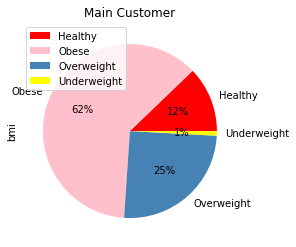

In [22]:
ins.groupby(['bmi_group']).sum().plot(kind='pie', y='bmi', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue', 'yellow'],
                                title='Main Customer')

In [23]:
ins


,age,age_group,sex,bmi,bmi_group,smoker,children,region,premium_charges
0,19,Young Adults,female,27.90,Overweight,yes,0,southwest,16884.92
1,18,Young Adults,male,33.77,Obese,no,1,southeast,1725.55
2,28,Young Adults,male,33.00,Obese,no,3,southeast,4449.46
3,33,Young Adults,male,22.70,Healthy,no,0,northwest,21984.47
4,32,Young Adults,male,28.88,Overweight,no,0,northwest,3866.86
...,...,...,...,...,...,...,...,...,...
1333,50,Middle Age,male,30.97,Obese,no,3,northwest,10600.55
1334,18,Young Adults,female,31.92,Obese,no,0,northeast,2205.98
1335,18,Young Adults,female,36.85,Obese,no,0,southeast,1629.83
1336,21,Young Adults,female,25.80,Overweight,no,0,southwest,2007.94


In [24]:
ins1= ins[ins['premium_charges']>16639.91] #75percentile
# ins.premium_charges.quantile([0.25,0.5,0.75])

ins1=ins1[ins1['bmi_group']!='Underweight']

ins1=ins1[ins1['age']>40]
ins1=ins1[ins1['smoker']!='no']
ins1

,age,age_group,sex,bmi,bmi_group,smoker,children,region,premium_charges
11,62,Seniors,female,26.29,Overweight,yes,0,southeast,27808.73
39,60,Seniors,male,39.90,Obese,yes,0,southwest,48173.36
52,48,Middle Age,male,28.00,Overweight,yes,1,southwest,23568.27
55,58,Seniors,male,36.95,Obese,yes,2,northwest,47496.49
58,53,Middle Age,female,22.88,Healthy,yes,1,southeast,23244.79
...,...,...,...,...,...,...,...,...,...
1303,43,Middle Age,male,27.80,Overweight,yes,0,southwest,37829.72
1304,42,Middle Age,male,24.61,Healthy,yes,2,northeast,21259.38
1321,62,Seniors,male,26.70,Overweight,yes,0,northeast,28101.33
1323,42,Middle Age,female,40.37,Obese,yes,2,southeast,43896.38


In [25]:
ins[ins['region'] == 'southeast']

,age,age_group,sex,bmi,bmi_group,smoker,children,region,premium_charges
1,18,Young Adults,male,33.77,Obese,no,1,southeast,1725.55
2,28,Young Adults,male,33.00,Obese,no,3,southeast,4449.46
5,31,Young Adults,female,25.74,Overweight,no,0,southeast,3756.62
6,46,Middle Age,female,33.44,Obese,no,1,southeast,8240.59
11,62,Seniors,female,26.29,Overweight,yes,0,southeast,27808.73
...,...,...,...,...,...,...,...,...,...
1322,62,Seniors,male,38.83,Obese,no,0,southeast,12981.35
1323,42,Middle Age,female,40.37,Obese,yes,2,southeast,43896.38
1327,51,Middle Age,male,30.03,Obese,no,1,southeast,9377.90
1330,57,Seniors,female,25.74,Overweight,no,2,southeast,12629.17


In [26]:
ins

,age,age_group,sex,bmi,bmi_group,smoker,children,region,premium_charges
0,19,Young Adults,female,27.90,Overweight,yes,0,southwest,16884.92
1,18,Young Adults,male,33.77,Obese,no,1,southeast,1725.55
2,28,Young Adults,male,33.00,Obese,no,3,southeast,4449.46
3,33,Young Adults,male,22.70,Healthy,no,0,northwest,21984.47
4,32,Young Adults,male,28.88,Overweight,no,0,northwest,3866.86
...,...,...,...,...,...,...,...,...,...
1333,50,Middle Age,male,30.97,Obese,no,3,northwest,10600.55
1334,18,Young Adults,female,31.92,Obese,no,0,northeast,2205.98
1335,18,Young Adults,female,36.85,Obese,no,0,southeast,1629.83
1336,21,Young Adults,female,25.80,Overweight,no,0,southwest,2007.94


In [27]:
#ins2=ins.loc[((ins['bmi'] >18.5) & (ins['bmi']<=24.9))]
# print(len(ins2))

In [28]:
ins.to_excel("insurance_cleaned.xlsx") 